# 공간분석 기반 연수구 현황분석 및 활성화 방안 제안_팀 알바트로스
- 유의 사항: 목차에서 '사용 데이터', '실거래가 EDA', '인구/사회 여건 통합' 부분은 내부 COMPAS Jupyter Notenook에서 진행하였습니다. 첨부파일을 내부 COMPAS Jupyter Notebook에서 진행해주시기 바라겠습니다.

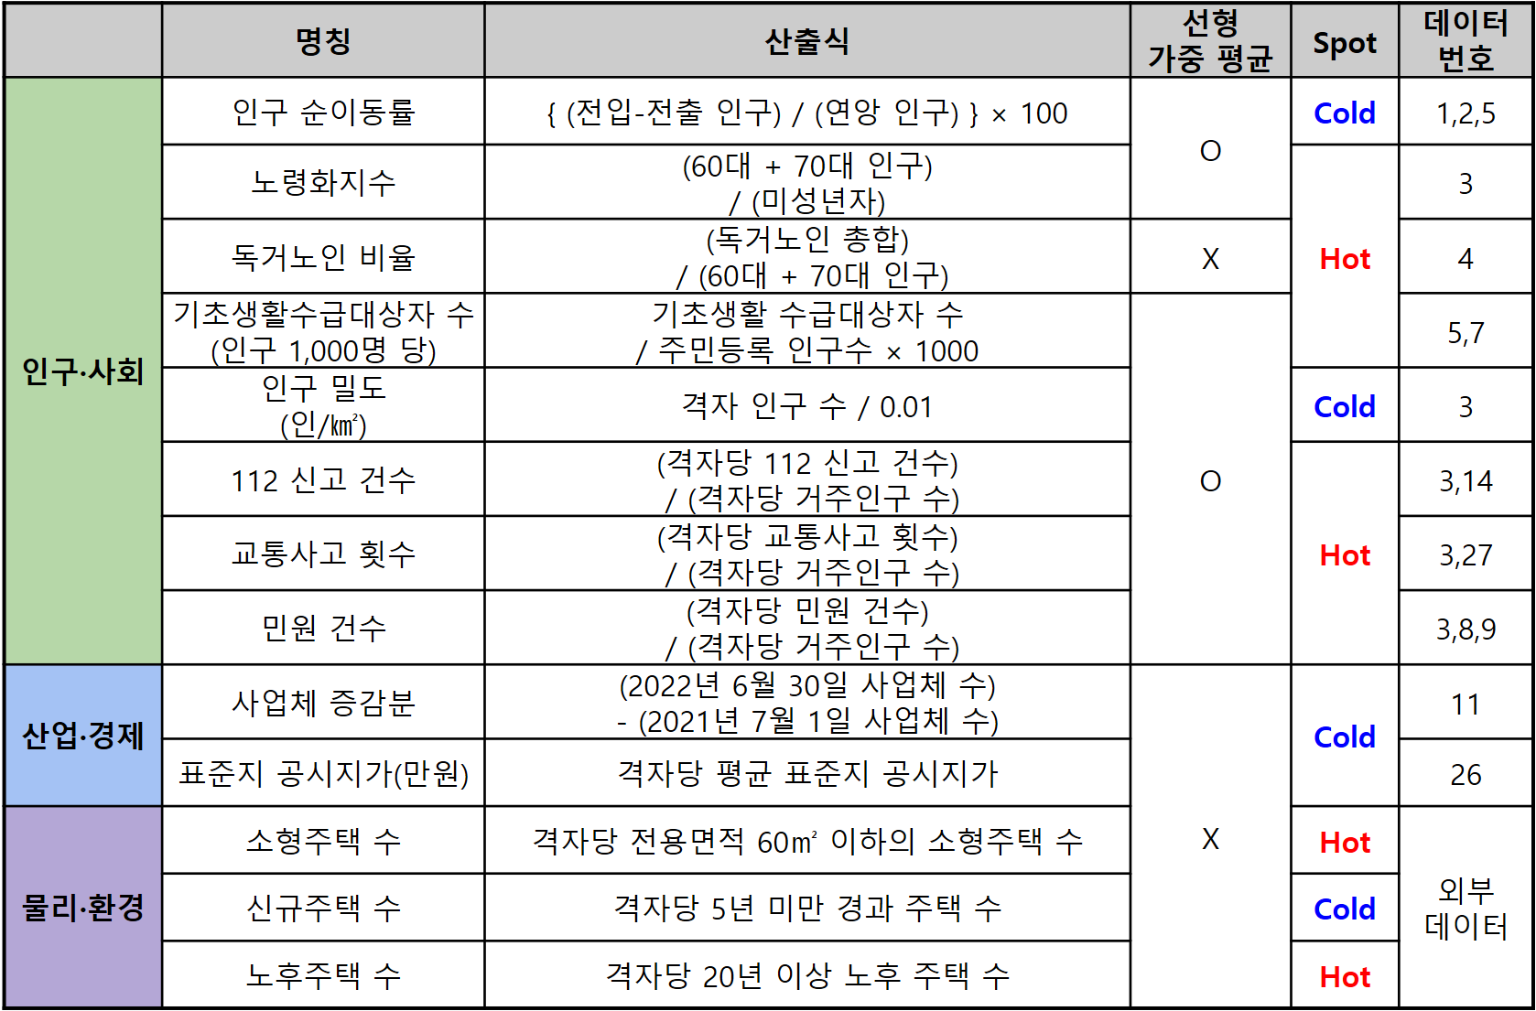

##  필요 라이브러리

In [1]:
# geopandas
!pip install geopandas

# # font - 한글
# # 한글깨짐 방지 - 가장 먼저 실행 후 Restart and Run All 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
# from geoband.API import *
import numpy as np
import pandas as pd
import geopandas as gpd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import sys

plt.rc("font", family="Malgun Gothic")

## 사용 데이터

In [ ]:
def get_compas_data(index, file_name):
    number = index
    GetCompasData('SBJ_2208_001', number, file_name)

In [ ]:
mod = sys.modules[__name__]

# Load files
file_list = ['1_연수구_전입현황.xlsx',
'2_연수구_전출현황.xlsx',
'3_연수구_거주인구_격자매핑.xlsx',
'4_연수구_독거노인.csv',
'5_연수구_성연령별_주민등록인구.xlsx',
'6_연수구_세대원수별_세대수.xlsx',
'7_연수구_기초생활수급대상자.xlsx',
'8_연수구_고충민원_격자매핑.xlsx',
'9_연수구_민원현황_격자매핑.xlsx',
'10_연수구_건축물대장_표제부.xlsx',
'11_연수구_상권정보.csv',
'12_연수구_학교현황.xlsx',
'13_연수구_차량등록현황_격자매핑.csv',
'14_연수구_112신고수_격자매핑.csv',
'15_연수구_아파트_매매_실거래가.xlsx',
'16_연수구_연립다세대_매매_실거래가.xlsx',
'17_연수구_단독다가구_매매_실거래가.xlsx',
'18_연수구_오피스텔_매매_실거래가.xlsx',
'19_연수구_아파트_전월세_실거래가.xlsx',
'20_연수구_연립다세대_전월세_실거래가.xlsx',
'21_연수구_단독다가구_전월세_실거래가.xlsx',
'22_연수구_오피스텔_전월세_실거래가.xlsx',
'23_연수구_상업업무용_매매_실거래가.xlsx',
'24_연수구_토지_실거래가.xlsx',
'25_연수구_분양입주권_실거래가.xlsx',
'26_연수구_개별공시지가.xlsx',
'27_연수구_교통사고_격자매핑.xlsx',
'28_연수구_격자_100X100.geojson']

for i in range(len(file_list)):
    get_compas_data(i+1, file_list[i])

# 연수구
ys = []
        
for i in range(len(file_list)):
    if ".xlsx" in file_list[i]: # xlsx 파일
        print(file_list[i], i+1)
        setattr(mod, f'ys_{i+1}', 
                pd.read_excel(file_list[i]))
    elif ".csv" in file_list[i]: # csv 파일
        print(file_list[i], i+1)
        setattr(mod, f'ys_{i+1}', 
                pd.read_csv(file_list[i], encoding='utf-8-sig'))

[2022-09-29 15:32:40] 성공 - 1_연수구_전입현황.xlsx
[2022-09-29 15:32:40] 성공 - 2_연수구_전출현황.xlsx
[2022-09-29 15:32:40] 성공 - 3_연수구_거주인구_격자매핑.xlsx
[2022-09-29 15:32:40] 성공 - 4_연수구_독거노인.csv
[2022-09-29 15:32:40] 성공 - 5_연수구_성연령별_주민등록인구.xlsx
[2022-09-29 15:32:40] 성공 - 6_연수구_세대원수별_세대수.xlsx
[2022-09-29 15:32:40] 성공 - 7_연수구_기초생활수급대상자.xlsx
[2022-09-29 15:32:40] 성공 - 8_연수구_고충민원_격자매핑.xlsx
[2022-09-29 15:32:40] 성공 - 9_연수구_민원현황_격자매핑.xlsx
[2022-09-29 15:32:40] 성공 - 10_연수구_건축물대장_표제부.xlsx
[2022-09-29 15:32:40] 성공 - 11_연수구_상권정보.csv
[2022-09-29 15:32:40] 성공 - 12_연수구_학교현황.xlsx
[2022-09-29 15:32:40] 성공 - 13_연수구_차량등록현황_격자매핑.csv
[2022-09-29 15:32:41] 성공 - 14_연수구_112신고수_격자매핑.csv
[2022-09-29 15:32:41] 성공 - 15_연수구_아파트_매매_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 16_연수구_연립다세대_매매_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 17_연수구_단독다가구_매매_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 18_연수구_오피스텔_매매_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 19_연수구_아파트_전월세_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 20_연수구_연립다세대_전월세_실거래가.xlsx
[2022-09-29 15:32:41] 성공 - 21_연

# 실거래가 EDA

In [ ]:
ys_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56711 entries, 0 to 56710
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bjd_nm          56711 non-null  object 
 1   road_nm         56711 non-null  object 
 2   bunji           56711 non-null  object 
 3   cmplx_nm        56711 non-null  object 
 4   exclusive_area  56711 non-null  float64
 5   cntrc_ym        56711 non-null  int64  
 6   cntrc_day       56711 non-null  int64  
 7   trade_price     56711 non-null  int64  
 8   floor           56711 non-null  int64  
 9   cnstr_year      56709 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 4.3+ MB


In [ ]:
ys_15["sntrc_y"] = pd.to_datetime(ys_15['cntrc_ym'], format='%Y%m').dt.strftime('%Y')
ys_15['bjd_nm'] = ys_15['bjd_nm'].str.split(' ').str[2]

<AxesSubplot:xlabel='cnstr_year', ylabel='trade_price'>

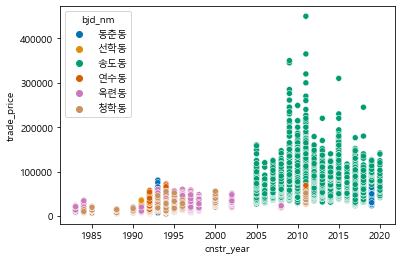

In [ ]:
#15_연수구 아파트 매매 실거래가 정보(2013~2020)
sns.scatterplot(data=ys_15, x="cnstr_year", y="trade_price", hue="bjd_nm", palette="colorblind") # 건축년도에 따른 행정동별 거래금액

# 송도동에 2005년 기점으로 신축 아파트들이 많이 생긴 것을 확인 송도 아파트가 전체적으로 거래 가격이 높은 편

<AxesSubplot:xlabel='bjd_nm', ylabel='count'>

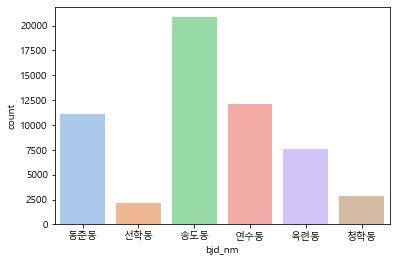

In [ ]:
sns.countplot(data=ys_15, x="bjd_nm", palette="pastel") # 전체 연도 범위에 대한 거래량

<AxesSubplot:xlabel='bjd_nm', ylabel='count'>

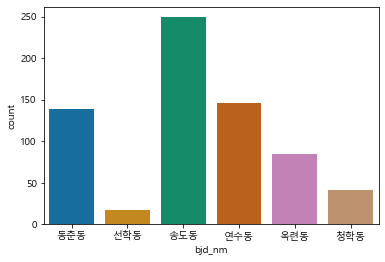

In [ ]:
sns.countplot(data=ys_15[ys_15['sntrc_y'] == '2022'], x="bjd_nm", palette="colorblind") # 2022년 거래량

# 전체연도 범위 그래프와 거의 동일한 형태

<AxesSubplot:xlabel='bjd_nm', ylabel='trade_price'>

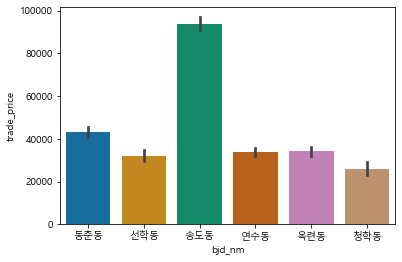

In [ ]:
sns.barplot(data=ys_15[ys_15['sntrc_y'] == '2022'], x="bjd_nm", y = "trade_price", palette="colorblind") # 2022년 행정동별 거래금액 평균

# 다른 지역에 비해 송도가 신축 건물이 많은 영향탓인지 거래 가격도 가장 높음

<AxesSubplot:xlabel='sntrc_y', ylabel='trade_price'>

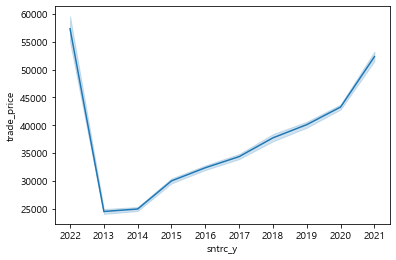

In [ ]:
sns.lineplot(data=ys_15, x='sntrc_y', y='trade_price')

# 인구/사회 여건

## 인구 순이동률
* 가중치
- 2022: 2 (= 4*(6/12))
- 2021: 3
- 2020: 2
- 2019: 1
* 이동자수 : 이동자수 산술평균 (= (전입1+ 전입2 + 전출+1 + 전출2)/2)

In [ ]:
# for i in range(len(file_list)):
#     get_compas_data(i+1, file_list[i])

# 연수구
ys = []
        
for i in range(len(file_list)):
    if ".xlsx" in file_list[i]: # xlsx 파일
        print(file_list[i], i+1)
        setattr(mod, f'ys_{i+1}', 
                pd.read_excel(file_list[i], sheet_name = None))
    elif ".csv" in file_list[i]: # csv 파일
        print(file_list[i], i+1)
        setattr(mod, f'ys_{i+1}', 
                pd.read_csv(file_list[i], encoding='utf-8-sig'))

1_연수구_전입현황.xlsx 1
2_연수구_전출현황.xlsx 2
3_연수구_거주인구_격자매핑.xlsx 3
4_연수구_독거노인.csv 4
5_연수구_성연령별_주민등록인구.xlsx 5
6_연수구_세대원수별_세대수.xlsx 6
7_연수구_기초생활수급대상자.xlsx 7
8_연수구_고충민원_격자매핑.xlsx 8
9_연수구_민원현황_격자매핑.xlsx 9
10_연수구_건축물대장_표제부.xlsx 10
11_연수구_상권정보.csv 11
12_연수구_학교현황.xlsx 12
13_연수구_차량등록현황_격자매핑.csv 13
14_연수구_112신고수_격자매핑.csv 14
15_연수구_아파트_매매_실거래가.xlsx 15
16_연수구_연립다세대_매매_실거래가.xlsx 16
17_연수구_단독다가구_매매_실거래가.xlsx 17
18_연수구_오피스텔_매매_실거래가.xlsx 18
19_연수구_아파트_전월세_실거래가.xlsx 19
20_연수구_연립다세대_전월세_실거래가.xlsx 20
21_연수구_단독다가구_전월세_실거래가.xlsx 21
22_연수구_오피스텔_전월세_실거래가.xlsx 22
23_연수구_상업업무용_매매_실거래가.xlsx 23
24_연수구_토지_실거래가.xlsx 24
25_연수구_분양입주권_실거래가.xlsx 25
26_연수구_개별공시지가.xlsx 26
27_연수구_교통사고_격자매핑.xlsx 27


In [ ]:
ys_2['2022'].isnull().sum()

emd_nm       0
sd_nm        0
sgg_nm       0
base_date    0
cnt          0
hshld_num    0
prsn_num     0
dtype: int64

In [ ]:
def move_in(year): # 전입
    df = ys_1[year][ys_1[year]['emd_nm'] != '송도동'].copy()
    df = df.groupby('emd_nm')['prsn_num'].sum().reset_index()
    df.rename(columns={'prsn_num':f'전입총계'}, inplace = True)
    return df
    
def move_out(year): # 전출
    df = ys_2[year][ys_2[year]['emd_nm'] != '송도동'].copy()
    df = df.groupby('emd_nm')['prsn_num'].sum().reset_index()
    df.rename(columns={'prsn_num':f'전출총계'}, inplace = True)
    return df

def population(ym, num): # 인구수
    df = ys_5['Sheet1'][(ys_5['Sheet1']['base_date'] == ym) & (ys_5['Sheet1']['emd_nm'] != '')].copy()
    df = df.groupby('emd_nm')['m_total_pop', 'w_total_pop'].sum().reset_index()
    df[f'인구수_{num}'] = df['m_total_pop'] + df['w_total_pop']
    return df[['emd_nm',f'인구수_{num}']]


def movement_rate(year, first_ym, second_ym, weight):
    # 전입총계
    df_in= move_in(year)
    
    # 전출총계
    df_out= move_out(year)
    
    # 전입총계 + 전출총계
    df_move = pd.merge(df_in, df_out, how='outer')
    
    #주민등록인구 전처리
    ys_5['Sheet1']['emd_nm'] = ys_5['Sheet1']['emd_nm'].str.replace('인천광역시 연수구 ', '')
    
    # 주민등록인구_초
    df_population1 = population(first_ym, 1)
    
    # 주민등록인구_말
    df_population2 = population(second_ym, 2)
    
    # 주민등록_초 + 주민등록_말
    df_pop = pd.merge(df_population1, df_population2, how='outer')
    
    df_movement = pd.merge(df_move, df_pop, how='outer')
    df_movement[f'{year}_이동률'] = (df_movement['전입총계'] - df_movement['전출총계']) \
                                    /((df_movement['인구수_1'] + df_movement['인구수_2'])/2) * 100 * weight
    
    return df_movement[['emd_nm', f'{year}_이동률']]
    
    
df_movement1 = movement_rate('2022', 202201, 202206, 2)
df_movement2 = movement_rate('2021', 202101, 202112, 3)
df_movement3 = movement_rate('2020', 202001, 202012, 2)
df_movement4 = movement_rate('2019', 201901, 201912, 1)

mv_rate = pd.merge(df_movement1, df_movement2, how='outer')
mv_rate2 = pd.merge(df_movement3, df_movement4, how='outer')
result_mv_rate = pd.merge(mv_rate, mv_rate2, how='outer')

result_mv_rate['순이동률_final'] = result_mv_rate.sum(axis=1) / 8

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:

## 노령화지수
* 가중치
- 2022: 3
- 2021: 2
- 2020: 1
* 노령화지수 : (60세이상 69세 이하 거주인구 + 70세 이상 거주 인구)/(0세 이상 19세 이하 거주인구) =  (60g_pop + 70g_pop) / (0g_pop)

In [ ]:
def aging(year,  weight):
    df = ys_3[year][['gid', 'm_0g_pop', 'w_0g_pop', 'm_60g_pop', 'w_60g_pop', 'm_70g_pop', 'w_70g_pop']].copy()
    
    df[f'{year}_노령화지수'] = (df['m_60g_pop'] + df['w_60g_pop'] + df['m_70g_pop'] + df['w_70g_pop']) \
                            /(df['m_0g_pop']+ df['w_0g_pop'] + 1) * weight # 0으로 나누는 경우 대비하여 1 더해줌

    return df[['gid', f'{year}_노령화지수']]

    
df_aging1 = aging('2022', 3)
df_aging2 = aging('2021', 2)
df_aging3 = aging('2020', 1)
df_aging = pd.merge(df_aging1, df_aging2, how='outer')
result_aging = pd.merge(df_aging, df_aging3, how='outer')
result_aging['노령화지수_final'] = result_aging.sum(axis=1) / 6

# 독거노인비율
* 가중치
- 2022: 3
- 2021: 2
- 2020: 1
- 독거노인비율 : (독거노인 총 합) / (60세이상 69세 이하 거주인구 + 70세 이상 거주 인구)
<br> = (tot_cnt) / (60g_pop + 70g_pop)

In [ ]:
ys_4['base_date'].unique()

array([201712, 201812, 201912, 202012, 202112, 202206])

In [ ]:
def age_population(ym): # 노령인구수
    df = ys_5['Sheet1'][(ys_5['Sheet1']['base_date'] == ym) & (ys_5['Sheet1']['emd_nm'] != '')].copy()
    df = df.groupby('emd_nm')['m_60g_pop', 'w_60g_pop', 'm_70g_pop', 'w_70g_pop'].sum().reset_index()
    df['노령인구수'] = df['m_60g_pop'] + df['w_60g_pop'] + df['m_70g_pop'] + df['w_70g_pop']
    return df[['emd_nm','노령인구수']]

def alone_population(ym): # 독거노인수
    df = ys_4[ys_4['base_date'] == ym].groupby('emd_nm')['tot_cnt'].sum().reset_index().copy()
    df.rename(columns={'tot_cnt':'독거노인수'}, inplace = True)
    return df


def alone_aging(year, ym, weight): # 독거노인 비율
    #주민등록인구 전처리
    ys_5['Sheet1']['emd_nm'] = ys_5['Sheet1']['emd_nm'].str.replace('인천광역시 연수구 ', '')
    
    # 60세이상 69세 이하 거주인구 + 70세 이상 거주 인구
    df_age_population = age_population(ym)

    # 독거노인 수
    df_alone_population = alone_population(ym)
    
    df_alone_ageing = pd.merge(df_age_population, df_alone_population, how='outer')
    df_alone_ageing[f'{year}_독거노인비율'] = df_alone_ageing['독거노인수']/df_alone_ageing['노령인구수'] * weight
    
    return df_alone_ageing[['emd_nm', f'{year}_독거노인비율']]


    
df_alone1 = alone_aging(2022, 202206, 3)
df_alone2 = alone_aging(2021, 202112, 2)
df_alone3 = alone_aging(2020, 202012, 1)
    
    

df_alone4 = pd.merge(df_alone1, df_alone2, how='outer')
df_alone = pd.merge(df_alone3, df_alone4, how='outer')
df_alone['독거노인비율_final'] = df_alone.sum(axis=1) / 6

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## 인구 1,000명당 기초생활수급대상자 수
- 2022: 3
- 2021: 2
- 2020: 1
- 기초생활수급자수/ 주민등록 인구수 * 1000

In [ ]:
def population(ym, num): # 인구수
    df = ys_5['Sheet1'][(ys_5['Sheet1']['base_date'] == ym) & (ys_5['Sheet1']['emd_nm'] != '')].copy()
    df = df.groupby('emd_nm')['m_total_pop', 'w_total_pop'].sum().reset_index()
    df[f'인구수_{num}'] = df['m_total_pop'] + df['w_total_pop']
    return df[['emd_nm',f'인구수_{num}']]


def recipient(year, first_ym, second_ym, weight): #기초수급자수
    #주민등록인구 전처리
    ys_5['Sheet1']['emd_nm'] = ys_5['Sheet1']['emd_nm'].str.replace('인천광역시 연수구 ', '')
    
    # 주민등록인구_초
    df_population1 = population(first_ym, 1)
    
    # 주민등록인구_말
    df_population2 = population(second_ym, 2)
    
    # 주민등록_초 + 주민등록_말
    df_pop = pd.merge(df_population1, df_population2, how='outer')


    # 기초생활수급자수
    df_recipient = ys_7[f'{year}_기초수급자현황'][ys_7[f'{year}_기초수급자현황']['emd_nm'] != '합 계'].copy()
    
    recipient_count = pd.merge(df_pop, df_recipient, how='outer')
    recipient_count[f'{year}_기초수급자수'] = (recipient_count['total_pop'])/((recipient_count['인구수_1']+recipient_count['인구수_2'])/2) \
                                                * 1000 * weight
    
    return recipient_count[['emd_nm', f'{year}_기초수급자수']]
    
    
df_recipient1 = recipient('2022', 202201, 202206, 3)
df_recipient2 = recipient('2021', 202101, 202112, 2)
df_recipient3 = recipient('2020', 202001, 202012, 1)

df_recipient4 = pd.merge(df_recipient1, df_recipient2, how='outer')
df_recipient = pd.merge(df_recipient3, df_recipient4, how='outer')
df_recipient['기초수급자수_final'] = df_recipient.sum(axis=1) / 6

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a 

## 인구밀도(인/㎢)
- 2022: 3
- 2021: 2
- 2020: 1
- 인구밀도(인/㎢) : (격자별 인구수) / 0.01

In [ ]:
def population_density(year, weight):
    df = ys_3[year].copy()
    df['인구총계'] = df.sum(axis=1)
    df[f'{year}_인구밀도'] = df['인구총계'] / 0.01 * weight
    
    return df[['gid', f'{year}_인구밀도']]
    
df_density1 = population_density('2022', 3)
df_density2 = population_density('2021', 2)
df_density3 = population_density('2020', 1)

df_density4 = pd.merge(df_density1, df_density2, how='outer')
df_density = pd.merge(df_density3, df_density4, how='outer')
df_density['인구밀도_final'] = df_density.sum(axis=1) / 6

## 112 신고 건수
- 2021: 3
- 2020: 2
- 2019: 1

In [ ]:
def report_112(year, weight):
    # 주민등록인구
    j_df = ys_3[f'{year}'].copy()
    j_df['주민등록인구'] = j_df.sum(axis=1)
    
    # 112 신고건수
    r_df = ys_14[ys_14['base_date'] == year].copy()
    
    # marge
    report_df = pd.merge(j_df, r_df, how='outer')
    
    report_df[f'{year}_112신고건수'] = report_df['cnt'] /(report_df['주민등록인구']+1) * weight
    return report_df[['gid', f'{year}_112신고건수']]
    
df_112_report1 = report_112(2021, 3)
df_112_report2 = report_112(2020, 2)
df_112_report3 = report_112(2019, 1)
df_112_report4 = pd.merge(df_112_report1, df_112_report2, how='outer')
df_112_report = pd.merge(df_112_report3, df_112_report4, how='outer')
df_112_report['112신고건수_final'] = df_112_report.sum(axis=1) / 6

## 교통사고건수
- 2021: 3
- 2020: 2
- 2019: 1

In [ ]:
def traffic_accident(year, weight):
    # 주민등록인구
    j_df = ys_3[year].copy()
    j_df['주민등록인구'] = j_df.sum(axis=1)
    
    # 교통사고건수
    a_df = ys_27['data-1659514367446'].copy()
    #[f'acdnt_cnt_{year}']
    
    # marge
    accident_df = pd.merge(j_df, a_df, how='outer')

    accident_df[f'{year}_교통사고건수'] = accident_df[f'acdnt_cnt_{year}'] /(accident_df['주민등록인구']+1) * weight
    return accident_df[['gid', f'{year}_교통사고건수']]
    
df_traffic_accident1 = traffic_accident('2021', 3)
df_traffic_accident2 = traffic_accident('2020', 2)
df_traffic_accident3 = traffic_accident('2019', 1)
df_traffic_accident4 = pd.merge(df_traffic_accident1, df_traffic_accident2, how='outer')
df_traffic_accident = pd.merge(df_traffic_accident3, df_traffic_accident4, how='outer')
df_traffic_accident['교통사고건수_final'] = df_traffic_accident.sum(axis=1) / 6

## 민원건수
- 2021: 3
- 2020: 2
- 2019: 1

In [ ]:
def complaints_cnt(year, weight):
    # 주민등록인구
    j_df = ys_3[year].copy()
    j_df['주민등록인구'] = j_df.sum(axis=1)
    
    # 민원건수
    c1_df = ys_8['Sheet1'].copy()
    c2_df = ys_9['Sheet1'].copy()
    
    c1_df['apply1_year'] = c1_df['apply_date'].astype('str').str[:4]
    c1_df = c1_df[c1_df['apply1_year'] == year]
    c1_df = c1_df.groupby('gid')['compl_contents'].count().reset_index()
    c1_df.rename(columns={'compl_contents':f'compl_contents1_{year}'}, inplace = True)
    
    c2_df['apply2_year'] = c2_df['apply_date'].astype('str').str[:4]
    c2_df = c2_df[c2_df['apply2_year'] == year]
    c2_df = c2_df.groupby('gid')['compl_contents'].count().reset_index()
    c2_df.rename(columns={'compl_contents':f'compl_contents2_{year}'}, inplace = True)

    # marge
    c_df = pd.merge(c1_df, c2_df, how='outer')
    
    complaints_cnt_df = pd.merge(j_df, c_df, how='outer')

    complaints_cnt_df[f'{year}_민원건수'] = (complaints_cnt_df[f'compl_contents1_{year}']+ complaints_cnt_df[f'compl_contents2_{year}']) /(complaints_cnt_df['주민등록인구']+1) * weight
    return complaints_cnt_df[['gid', f'{year}_민원건수']]
    
df_complaints_cnt1 = complaints_cnt('2021', 3)
df_complaints_cnt2 = complaints_cnt('2020', 2)
df_complaints_cnt3 = complaints_cnt('2019', 1)
df_complaints_cnt4 = pd.merge(df_complaints_cnt1, df_complaints_cnt2, how='outer')
df_complaints_cnt = pd.merge(df_complaints_cnt3, df_complaints_cnt4, how='outer')
df_complaints_cnt['민원건수_final'] = df_complaints_cnt.sum(axis=1) / 6

## 인구/사회 여건 통합

In [ ]:
def gid_mapping(): # 거주 인구 격자매핑
    yeonsu_mapping = pd.read_csv('ys_mapping_complete.csv')
    # yeonsu_mapping['행정동'] = yeonsu_mapping['행정동'].str.replace('인천광역시 연수구 ', '')
    yeonsu_mapping.rename(columns={'행정동':'emd_nm'}, inplace = True)
    
    return yeonsu_mapping

In [ ]:
yeonsu_mapping = gid_mapping()

# 순이동률 통합
df_mv_rate = pd.merge(yeonsu_mapping, result_mv_rate[['emd_nm', '순이동률_final']], how='outer')

# 노령화지수
df_result_aging = pd.merge(df_mv_rate, result_aging[['gid', '노령화지수_final']], how='outer')

# 독거노인비율
df_alone_rate = pd.merge(df_result_aging, df_alone[['emd_nm', '독거노인비율_final']], how='outer')

# 기초생활수급대상자 수
df_recipient_cnt = pd.merge(df_alone_rate, df_recipient[['emd_nm', '기초수급자수_final']], how='outer')

# 인구밀도
df_density_cnt = pd.merge(df_recipient_cnt, df_density[['gid', '인구밀도_final']], how='outer')

# 112 신고건수
df_df_112_report_cnt = pd.merge(df_density_cnt, df_112_report[['gid', '112신고건수_final']], how='outer')

# 교통사고건수
df_traffic_accident_cnt = pd.merge(df_df_112_report_cnt, df_traffic_accident[['gid', '교통사고건수_final']], how='outer')

# 민원건수
df_complaints_cnt_cnt = pd.merge(df_traffic_accident_cnt, df_complaints_cnt[['gid', '민원건수_final']], how='outer')


df_complaints_cnt_cnt.rename(columns={'순이동률_final':'mv_rate','노령화지수_final':'aging_cnt', '독거노인비율_final':'alone_rate', \
                                              '기초수급자수_final':'recipient_cnt', '인구밀도_final':'density_cnt', \
                                     '112신고건수_final':'112_report_cnt', '교통사고건수_final':'accident_cnt', '민원건수_final':'complaints_cnt'}, inplace=True)


final_result = df_complaints_cnt_cnt.copy()
# final_result['gid_num'] = final_result['gid'].str.replace('다사', '') #  gid 한글 제거

# gid 결측치 제거
final_result = final_result[final_result['gid'].notnull()]

# 값 0 전처리
final_result.fillna(0, inplace = True)

# 최종 결과 - 송도 제거
final_result = final_result[(final_result['emd_nm'] != '송도1동') & (final_result['emd_nm'] != '송도2동') & (final_result['emd_nm'] != '송도3동') & (final_result['emd_nm'] != '송도4동')]

# final_result.to_csv('전처리/인구_사회여건_통합.csv', index= False, encoding = 'utf-8-sig')
# df = pd.merge(yeonsu_mapping, ys_3[year])
# df[['행정동', 'm_60g_pop', 'w_60g_pop', 'm_70g_pop', 'w_70g_pop']]

# 건축물대장: 자세한 주택 요소를 보기 위해 외부데이터 사용 
- 출처: [건축데이터 민간개방 시스템](https://open.eais.go.kr/opnsvc/opnSvcInqireView.do#)

In [2]:
# base path
base_path = '/content/drive/MyDrive/Albatross/yeonsu/'
data_path = base_path+'data/total_data/'

In [4]:
# files
shapes = gpd.read_file('ys_mapping_no_songdo.shp') # geojson 을 바탕으로 QGIS에서 처리한 file
ys_bd_origin = pd.read_excel('연수구_표제부_외부데이터_건축데이터민간개방시스템.xlsx', sheet_name=0, header=4) # 외부 데이터(건축데이터 민간개방시스템)

#### 표제부 데이터에 건물 노후도 계산하여 처리 및 전처리
1. 송도동 제외(연수구 원도심만 활용)
2. NaN 처리 및 날짜 데이터 오류(오타 등) 처리

In [5]:
# 전처리

# ys_bd_origin.use_apr_day.fillna('20990101') # NaN은 해당 날짜로 통일 예정. 
# 2099년 01월 01일로 한 사유 -> 등록되지 않은 내용들의 경우 나중에 전처리 할 필터링의 용도로서 datetime64[ns] 의 max 값으로서 선택한 것.
# ys_bd_origin.use_apr_day idx : 5214 -> '09800624', idx:5246 -> '09981218' 오타로 추정. 1998년도 로 변경 예정
# 사용승인일 : 1980년도만 있음 허가일이 19800421 이므로 허가일 기준으로 변경
# ys_bd_origin 에서 혼자 '1980' 되어있는 것 확인 index 655 : '1980' / NaN -> 2099-01-01 처리. 2999-01-01은 범위 밖
# ys_bd_origin.use_apr_day 에서 '19590800' 으로 오타 확인. '19590800' -> '19590801'로 변경
# ys_bd_origin.use_apr_day 에서 '09800624' 으로 오타 확인. '09800624' -> '19800624'로 변경
# ys_bd_origin.use_apr_day 에서 '09981218' 으로 오타 확인. '09981218' -> '19981218'로 변경
# ys_bd_origin.use_apr_day 에서 '19943 12'으로 오타 확인. 1994-03-12 로 추정 해당으로 변경

ys_bd_origin['사용승인일'] = ys_bd_origin['사용승인일'].fillna('20990101').replace('1980', '19800421', 
     regex=False).replace('19943 12', '19940312', 
    regex=False).replace('09800624', '19800624', regex=False).replace('09981218', '19981218', 
    regex=False).replace('19590800', '19590801', regex=False)


ys_bd_origin['사용승인일'] = pd.to_datetime(ys_bd_origin['사용승인일'], format='%Y-%m-%d')

# 건물노후도 building deterioration -> build_dete
# exp = 2022 - ys_bd_origin['사용승인일'].dt.year
# # 노후도 클수록 옛날! 그래서 -77이 미래인 2099-01-01
ys_bd_origin['노후도'] = 2022 - ys_bd_origin['사용승인일'].dt.year 

# ys_bd[ys_bd['노후도'] < 0]['노후도'].value_counts() # -77    159 -> -77은 위의 2099-01-01 인 경우.
# -77 의 사용승일인 NaN은 0으로 통일.
ys_bd_origin['노후도'] = ys_bd_origin['노후도'].replace(-77,0)

# 송도동 제외
ys_bd_origin = ys_bd_origin[~(ys_bd_origin['대지위치'].str.contains('송도동'))]

In [6]:
ys_bd_origin.columns

Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명',
       '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번',
       '새주소부번', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)',
       '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조', '주용도코드',
       '주용도코드명', '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수(세대)', '가구수(가구)',
       '높이(m)', '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적(㎡)',
       '총동연면적(㎡)', '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', '옥외기계식면적(㎡)',
       '옥내자주식대수(대)', '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주식면적(㎡)', '허가일', '착공일',
       '사용승인일', '허가번호년', '허가번호기관코드', '허가번호기관코드명', '허가번호구분코드', '허가번호구분코드명',
       '호수(호)', '에너지효율등급', '에너지절감율', 'EPI점수', '친환경건축물등급', '친환경건축물인증점수',
       '지능형건축물등급', '지능형건축물인증점수', '생성일자', '내진설계적용여부', '내진능력', '노후도'],
      dtype='object')

In [7]:
# 사용하지 않을 데이터 제외하고 확인 

ys_bd_origin = ys_bd_origin.drop(columns=['대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명', '블록', '로트', 
                                          '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번', '새주소부번', '지붕코드', '지붕코드명', 
                                          '기타지붕', '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', 
                                          '옥외기계식면적(㎡)', '옥내자주식대수(대)', '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주식면적(㎡)', '허가번호년', 
                                          '허가번호기관코드', '허가번호기관코드명', '허가번호구분코드', '허가번호구분코드명', '에너지효율등급', '에너지절감율', 'EPI점수', 
                                          '친환경건축물등급', '친환경건축물인증점수', '지능형건축물등급', '지능형건축물인증점수', '내진설계적용여부', '내진능력',])

In [8]:
ys_bd_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   순번           7109 non-null   int64         
 1   대지위치         7109 non-null   object        
 2   시군구코드        7109 non-null   int64         
 3   법정동코드        7109 non-null   int64         
 4   대지구분코드       7109 non-null   int64         
 5   번            7109 non-null   int64         
 6   지            7109 non-null   int64         
 7   관리건축물대장PK    7109 non-null   object        
 8   동명칭          1816 non-null   object        
 9   주부속구분코드      7104 non-null   float64       
 10  주부속구분코드명     7104 non-null   object        
 11  대지면적(㎡)      7109 non-null   float64       
 12  건축면적(㎡)      7109 non-null   float64       
 13  건폐율(%)       7109 non-null   float64       
 14  연면적(㎡)       7109 non-null   float64       
 15  용적률산정연면적(㎡)  7109 non-null   float64       
 16  용적률(%)

In [9]:
# 송도동 제외 및 전처리한 파일로서 저장
ys_bd_origin.to_csv('연수구_표제부_noSongdo.csv', encoding='utf-8')

#### 전처리 및 지리 정보 추가된 파일.
위의 처리한 파일에 따로 연수구 표제부의 주소에 -> 지리정보를 geocode로 처리하여 위도, 경도, geometry 추가하여 결합함. 아래의 : ys_bd로 불러온 파일.

해당의 코드에 지오코딩 사이트에서 제대로 처리되지 않은 값들이 많이 않고 compas에서 제공된 내용과 중복되는 내용들이 있어서 엑셀로 수기로 빈 값처리 및 이상치 수정하여 표제부데이터.csv 로 가공 후 나머지 작업 등 진행

In [10]:
# 외부 데이터 위도, 경도, geometry 정보를 외부(지오코딩 사이트)에서 따로 처리하여 geocode 추가한 파일
ys_bd = pd.read_csv('표제부_외부_가공.csv', encoding='utf-8')
ys_bd = ys_bd.drop(columns=['Unnamed: 0'])
ys_bd.head(2)

,순번,대지위치,시,구,동,번지,시군구코드,법정동코드,대지구분코드,번,...,허가일,착공일,사용승인일,호수(호),생성일자,_GC_TYPE,geometry,lon,lat,노후도
0,1,인천광역시 연수구 옥련동 105번지,인천광역시,연수구,옥련동,105번지,28185,10100,0,105,...,NaN,NaN,2099-01-01,0,20200427,0,POINT (126.6498 37.430043),126.649800,37.430043,0
1,2,인천광역시 연수구 옥련동 112-6번지,인천광역시,연수구,옥련동,112-6번지,28185,10100,0,112,...,NaN,NaN,1972-08-03,0,20210507,0,POINT (126.65063789993397 37.42923573600393),126.650638,37.429236,50


In [11]:
ys_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   순번           6833 non-null   int64  
 1   대지위치         6833 non-null   object 
 2   시            6833 non-null   object 
 3   구            6833 non-null   object 
 4   동            6833 non-null   object 
 5   번지           6833 non-null   object 
 6   시군구코드        6833 non-null   int64  
 7   법정동코드        6833 non-null   int64  
 8   대지구분코드       6833 non-null   int64  
 9   번            6833 non-null   int64  
 10  지            6833 non-null   int64  
 11  관리건축물대장PK    6833 non-null   object 
 12  동명칭          1733 non-null   object 
 13  주부속구분코드      6828 non-null   float64
 14  주부속구분코드명     6828 non-null   object 
 15  대지면적(㎡)      6833 non-null   float64
 16  건축면적(㎡)      6833 non-null   float64
 17  건폐율(%)       6833 non-null   float64
 18  연면적(㎡)       6833 non-null   float64
 19  용적률산정연

#### 소형주택

In [ ]:
# 전용면적 60㎡ 이하 -> '건축면적(㎡)' 이하 == 소형주택 / 송도동 제외
# 주택법 시행령 [시행 2022. 2. 11.] [대통령령 제32411호, 2022. 2. 11., 일부개정] -> 세대별 주거전용면적은 60제곱미터 이하일 것

In [12]:
ys_bd.head(2)

,순번,대지위치,시,구,동,번지,시군구코드,법정동코드,대지구분코드,번,...,허가일,착공일,사용승인일,호수(호),생성일자,_GC_TYPE,geometry,lon,lat,노후도
0,1,인천광역시 연수구 옥련동 105번지,인천광역시,연수구,옥련동,105번지,28185,10100,0,105,...,NaN,NaN,2099-01-01,0,20200427,0,POINT (126.6498 37.430043),126.649800,37.430043,0
1,2,인천광역시 연수구 옥련동 112-6번지,인천광역시,연수구,옥련동,112-6번지,28185,10100,0,112,...,NaN,NaN,1972-08-03,0,20210507,0,POINT (126.65063789993397 37.42923573600393),126.650638,37.429236,50


In [13]:
ys_bd.columns

Index(['순번', '대지위치', '시', '구', '동', '번지', '시군구코드', '법정동코드', '대지구분코드', '번', '지',
       '관리건축물대장PK', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)',
       '건폐율(%)', '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조',
       '주용도코드', '주용도코드명', '기타용도', '세대수(세대)', '가구수(가구)', '높이(m)', '부속건축물수',
       '부속건축물면적(㎡)', '총동연면적(㎡)', '허가일', '착공일', '사용승인일', '호수(호)', '생성일자',
       '_GC_TYPE', 'geometry', 'lon', 'lat', '노후도'],
      dtype='object')

In [14]:
ys_small = ys_bd[['순번','대지위치','건축면적(㎡)','주용도코드명','허가일','착공일','사용승인일','lon','lat']]
ys_small = ys_small[ys_small['건축면적(㎡)'] <= 60]
ys_small.to_csv('소형주택_가공.csv', encoding='cp949')

# Font Settings
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결

<Figure size 1200x700 with 0 Axes>

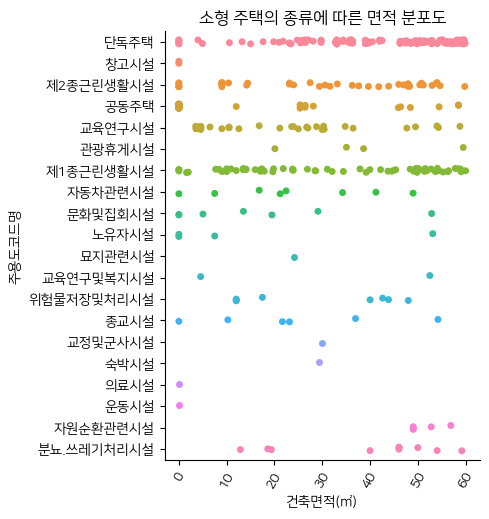

In [15]:
# ys_small.value_counts('건축면적(㎡)')
# 소형 주택의 시설의 종류에 따른 면적 분포도
plt.figure(figsize=(12, 7))
sns.catplot(data=ys_small, x='건축면적(㎡)', y='주용도코드명')
plt.xticks(rotation=60)
plt.title('소형 주택의 종류에 따른 면적 분포도')
plt.show()

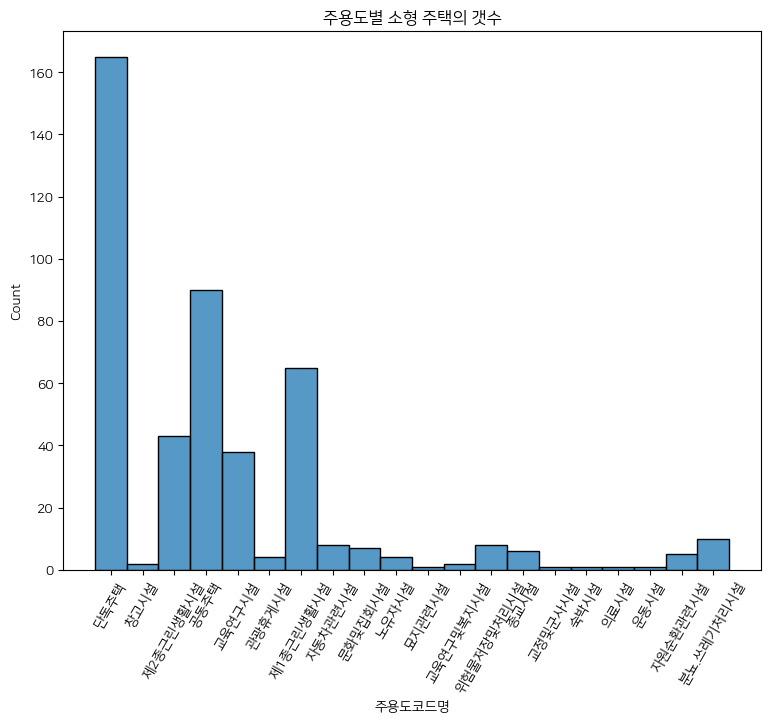

In [16]:
# 시설의 종류, 건물의 주용도 명
plt.figure(figsize=(9, 7))
sns.histplot(data=ys_small, x='주용도코드명')
plt.xticks(rotation=60)
plt.title('주용도별 소형 주택의 갯수')
plt.show()

#### 신규주택 & 노후주택

In [17]:
# 5년 미만
ys_oldnew = ys_bd[['순번','대지위치','건축면적(㎡)','주용도코드명','허가일','착공일','사용승인일','노후도','lon','lat',]]
ys_od1 = ys_oldnew[ys_oldnew['노후도'] < 5]

# 30년 이상
ys_od2 = ys_oldnew[ys_oldnew['노후도'] >= 20]

ys_od1.to_csv('5년미만_가공.csv', encoding='cp949')
ys_od2.to_csv('20년이상_가공.csv', encoding='cp949')

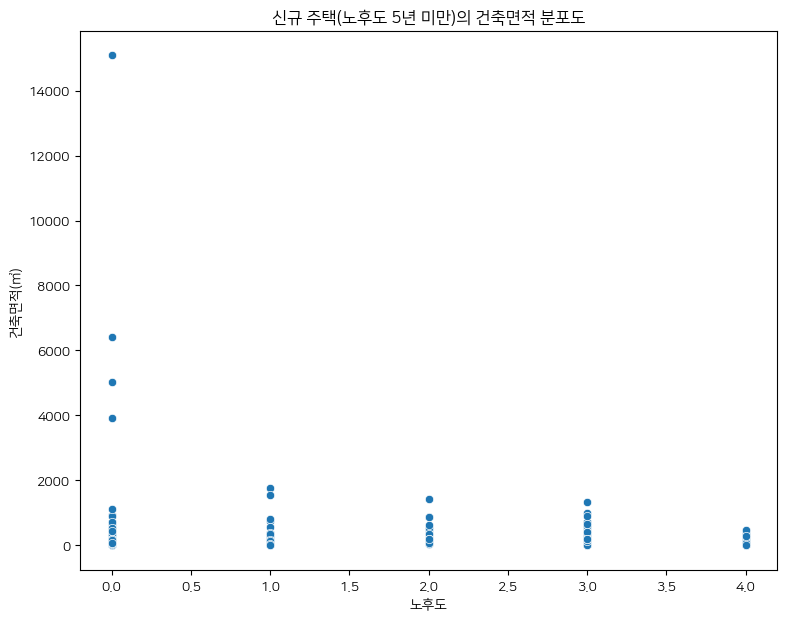

In [18]:
# 신규 주택
plt.figure(figsize=(9,7))
sns.scatterplot(data=ys_od1, x='노후도', y='건축면적(㎡)')
plt.title('신규 주택(노후도 5년 미만)의 건축면적 분포도')
plt.show()

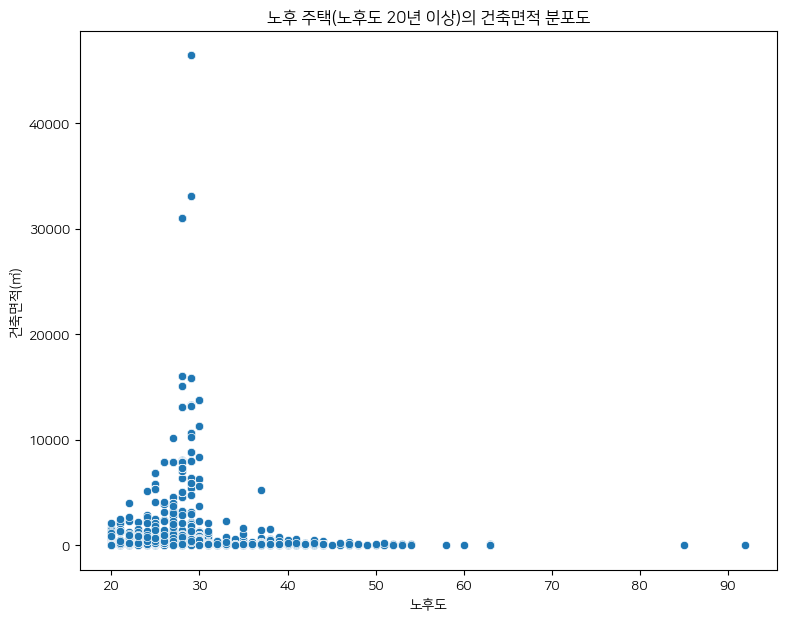

In [19]:
# 노후 주택
plt.figure(figsize=(9,7))
sns.scatterplot(data=ys_od2, x='노후도', y='건축면적(㎡)')
plt.title('노후 주택(노후도 20년 이상)의 건축면적 분포도')
plt.show()

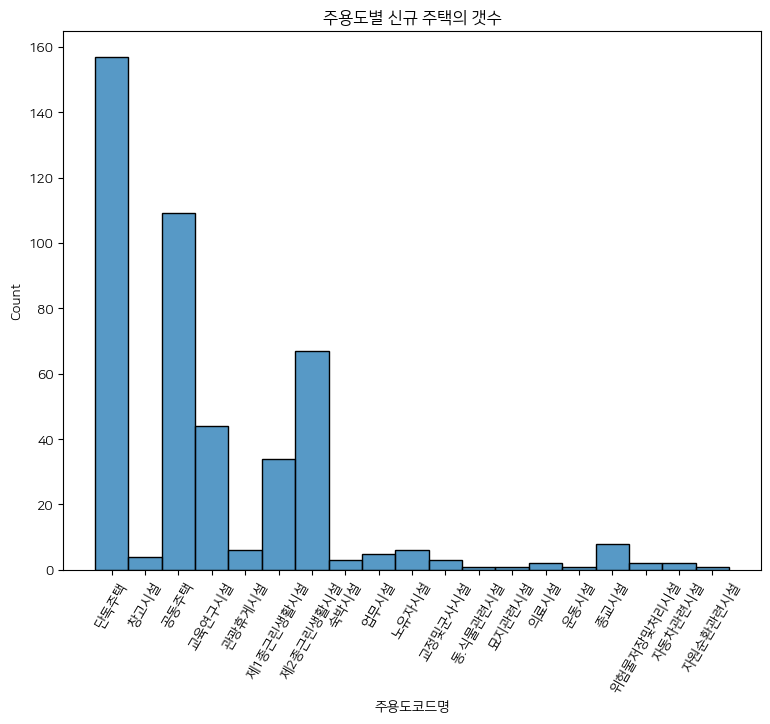

In [20]:
# 시설의 종류, 건물의 주용도 명
plt.figure(figsize=(9, 7))
sns.histplot(data=ys_od1, x='주용도코드명')
plt.xticks(rotation=60)
plt.title('주용도별 신규 주택의 갯수')
plt.show()

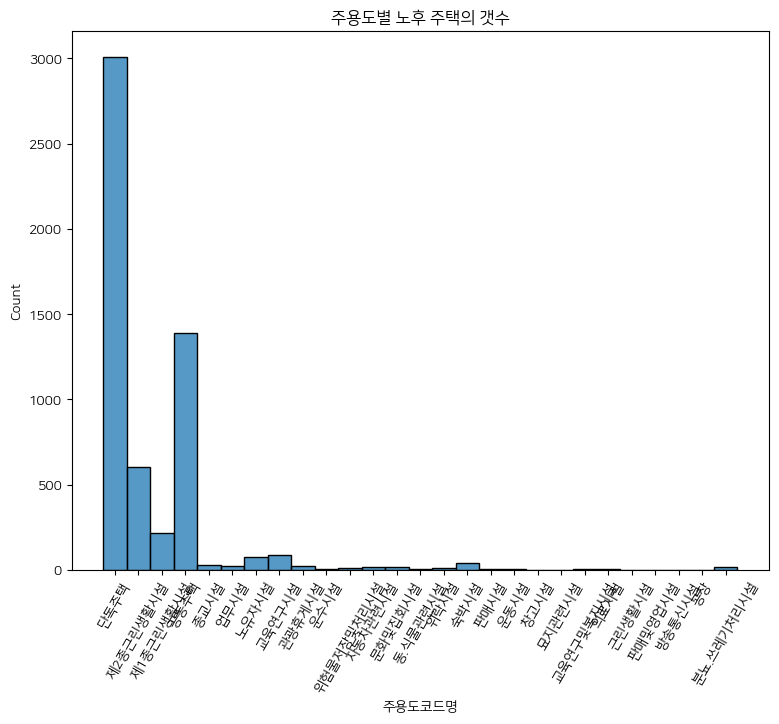

In [21]:
# 시설의 종류, 건물의 주용도 명
plt.figure(figsize=(9, 7))
sns.histplot(data=ys_od2, x='주용도코드명')
plt.xticks(rotation=60)
plt.title('주용도별 노후 주택의 갯수')
plt.show()

# Local G Cluster Map (High/Low Clustering)

In [68]:
!pip install pygeoda

In [69]:
import pygeoda

import matplotlib
import matplotlib.pyplot as plt

In [81]:
# Getis-Ord G (High/Low Clustering)
gdf = gpd.read_file('population.gpkg') # 또는 geojosn, gpkg 파일
df = pygeoda.open(gdf)
queen_w = pygeoda.queen_weights(df)

i_list = ['mv_rate', 'aging_cnt', 'alone_rate', 'recipient_cnt', 'density_cnt', '112_report_cnt', 'accident_cnt', 'complaints_cnt']
x_list = ['mv_rate_c', 'aging_cnt_h', 'alone_rate_h', 'recipient_cnt_h', 'density_cnt_c', '112_report_cnt_h', 'accident_cnt_h', 'complaints_cnt_h']
# x_list = ['mv_rate_c', 'aging_cnt_h', 'alone_rate_h', 'recipient_cnt_h', 'density_cnt_c']
for item in i_list:
    localg = pygeoda.local_g(queen_w, gdf[item])

    # attach Local G cluster indicators to geodataframe
    gdf[f'{item}_LocalG'] = localg.lisa_clusters()
# gdf.to_file(f'전처리/{item}.geojson', driver='GeoJSON')

gdf.loc[gdf['mv_rate_LocalG'] == 2, 'mv_rate_c'] = 1
gdf.loc[gdf['aging_cnt_LocalG'] == 1, 'aging_cnt_h'] = 1
gdf.loc[gdf['alone_rate_LocalG'] == 1, 'alone_rate_h'] = 1
gdf.loc[gdf['recipient_cnt_LocalG'] == 1, 'recipient_cnt_h'] = 1
gdf.loc[gdf['density_cnt_LocalG'] == 2, 'density_cnt_c'] = 1
gdf.loc[gdf['112_report_cnt_LocalG'] == 1, '112_report_cnt_h'] = 1
gdf.loc[gdf['accident_cnt_LocalG'] == 1, 'accident_cnt_h'] = 1
gdf.loc[gdf['complaints_cnt_LocalG'] == 1, 'complaints_cnt_h'] = 1

gdf['total_final_LocalG']=gdf.loc[:,x_list].sum(axis=1)
gdf.to_file(f'total_final_LocalG.geojson', driver='GeoJSON')

## 산업, 경제 Local G 분석

In [82]:
# Getis-Ord G (High/Low Clustering)
gdf_eco = gpd.read_file('price.gpkg') # Qgis로 가공한 파일

# '' data replace to 0
gdf_eco = gdf_eco.replace('', 0)

# change str to float
# Convert multiple columns
gdf_eco = gdf_eco.astype({'increment_company':'float','land_price':'float'})
df = pygeoda.open(gdf_eco)

i_list = ['increment_company', 'land_price',]

for item in i_list:
    localg = pygeoda.local_g(queen_w, gdf_eco[item])

    # attach Local G cluster indicators to geodataframe
    gdf_eco[f'{item}_LocalG'] = localg.lisa_clusters()
# gdf.to_file(f'전처리/{item}.geojson', driver='GeoJSON')

In [83]:
gdf_eco.loc[gdf_eco['land_price_LocalG'] == 2, 'land_price_c'] = 1
gdf_eco.loc[gdf_eco['increment_company_LocalG'] == 2, 'increment_company_c'] = 1

In [84]:
x_list = ['land_price_c', 'increment_company_c']
gdf_eco['final_LocalG_eco']=gdf_eco.loc[:,x_list].sum(axis=1)
gdf_eco.to_file(f'final_LocalG_eco.geojson', driver='GeoJSON')

## 주택 Local G 분석

In [85]:
# Getis-Ord G (High/Low Clustering)
gdf_house = gpd.read_file('house.gpkg') # Qgis로 가공한 파일

df = pygeoda.open(gdf_house)

i_list = ['20y_num', '5y_num', 'tiny_num']

for item in i_list:
  localg = pygeoda.local_g(queen_w, gdf_house[item])

    # attach Local G cluster indicators to geodataframe
  gdf[f'{item}_LocalG'] = localg.lisa_clusters()
# gdf.to_file(f'전처리/{item}.geojson', driver='GeoJSON')

In [86]:
gdf.loc[gdf['tiny_num_LocalG'] == 1, 'tiny_num_h'] = 1
gdf.loc[gdf['5y_num_LocalG'] == 2, '5y_num_c'] = 1
gdf.loc[gdf['20y_num_LocalG'] == 1, '20y_num_h'] = 1

In [87]:
x_list = ['tiny_num_h', '5y_num_c', '20y_num_h', ]
gdf['final_LocalG_bld']=gdf.loc[:,x_list].sum(axis=1)
gdf.to_file(f'final_LocalG_bld(20y)_last.geojson', driver='GeoJSON')

In [88]:
# gdf1 = gpd.read_file('final_LocalG_bld.geojson')
gdf1 = gpd.read_file('final_LocalG_bld(20y)_last.geojson')
gdf2 = gpd.read_file('final_LocalG_eco.geojson')

final_df = pd.merge(gdf, gdf1, how='outer')
final_df = pd.merge(final_df, gdf2, how='outer')

final_df['all_final_LocalG'] = final_df['total_final_LocalG'] + final_df['final_LocalG_bld']  + final_df['final_LocalG_eco']
final_df[['gid', 'emd_nm', 'geometry', 'total_final_LocalG', 'final_LocalG_bld', 'final_LocalG_eco', 'all_final_LocalG']].to_file(f'all_final_LocalG(합).geojson', driver='GeoJSON')
final_df.to_file(f'all_final_LocalG(전체).geojson', driver='GeoJSON')

# pydeck

In [89]:
!pip install pydeck
!jupyter nbextension install --sys-prefix --symlink --overwrite --py pydeck
!jupyter nbextension enable --sys-prefix --py pydeck

Installing C:\Users\Han\anaconda3\lib\site-packages\pydeck\nbextension/static -> pydeck
Symlinking: C:\Users\Han\anaconda3\share\jupyter\nbextensions\pydeck -> C:\Users\Han\anaconda3\lib\site-packages\pydeck\nbextension\static
Traceback (most recent call last):
  File "C:\Users\Han\anaconda3\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Han\AppData\Roaming\Python\Python39\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Han\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 978, in launch_instance
    app.start()
  File "C:\Users\Han\anaconda3\lib\site-packages\notebook\nbextensions.py", line 980, in start
    super().start()
  File "C:\Users\Han\AppData\Roaming\Python\Python39\site-packages\jupyter_core\application.py", line 258, in start
    self.subapp.start()
  File "C:\Users\Han\anaconda3\lib\site-pa

In [90]:
import pydeck as pdk
import sys,os,os.path
import pandas as pd


MAPBOX_API_KEY = 'pk.eyJ1IjoiZ3JhY2VoYXQiLCJhIjoiY2w4bDNxcW5nMGRwMjNvbGFwMzR4Z3drNiJ9.I-uYK82asps7kdDhcB2sqw'
os.environ["MAPBOX_API_KEY"]= MAPBOX_API_KEY


p_df = final_df[['geometry', 'all_final_LocalG']].copy()
p_df = pd.DataFrame(p_df)

def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

p_df['coordinates'] = p_df['geometry'].apply(multipolygon_to_coordinates)
del p_df['geometry']

p_df['정규화'] =p_df['all_final_LocalG'] / p_df['all_final_LocalG'].max()

# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    p_df, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*정규화, 120]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
    get_elevation = 'all_final_LocalG'
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

layer.extruded = True
# layer.get_elevation = 'all_final_LocalG'
layer.elevation_scale = 50

view_state.bearing=-15
view_state.pitch=45

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('demo.html')
r.to_html()

C:\Users\Han\AppData\Local\Temp\ipykernel_13008\2934843976.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lon, lat = x[0].exterior.xy


# 워드클라우드용 전처리

1. 송도가 들어가면서 유원지는 들어가지 않은 문장 제외
2. * 가 들어간 문장 제외 동일한 문장은 1개로 통일

In [ ]:
!pip install konlpy

In [ ]:
# 불용어
# 인천, 연수구, 신고, 신문고, 기타, 안전, 이송, 민원, 검토, 대한, 관련, 정책, 제보, 관리, 강화, 구청, 국민, 국가, 금지, 기관, 달라, 도망, 문제, 최고서, 워터프런트

In [ ]:
from collections import Counter
from konlpy.tag import Okt

okt = Okt()

sentences = ys_8['Sheet1']['compl_contents'].dropna().astype('str').values.tolist() + ys_9['Sheet1']['compl_contents'].dropna().astype('str').values.tolist() # 민원 데이터

# 민원 리스트 전처리
sentence_list = []

for sentence in sentences:
    if '송도' in sentence and '유원지' not in sentence:
        continue
    elif '*' not in sentence and sentence in sentence_list:
        continue
    else:
        sentence_list.append(sentence)

        
# # 5. 명사 혹은 형용사인 품사만 선별해 리스트에 담기        
noun_adj_list = []
# 불용어
stopword = ['인천', '연수구', '신고', '신문고', '기타', '안전', '이송', '민원', '검토', '대한', '관련', '정책', '제보', '관리', '강화', '구청', '국민', '국가', '금지', '기관', '달라', '도망', '문제', '최고서', '워터프런트', '불법', '정차', '주차', '파일', '요청', '정신', '연수', '시간', '첨부파일', '요망', '확인', '발생', '센트', '로드', '번길']
for sentence in sentence_list:
    for word in okt.pos(sentence, stem=True):
# if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
        if word[1] in ['Noun']:
            if len(word[0]) > 1 and word[0] not in stopword:
                noun_adj_list.append(word[0])

In [ ]:
counts = Counter(noun_adj_list)
tags = counts.most_common(100) # 가장 많이 나온 단어부터 50개 저장

In [ ]:
tags_df = pd.DataFrame(dict(tags).items(), columns=['단어', '수량'])
tags_df.to_csv('word_counts.csv', index = False)